In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 한글 폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 그래프 마이너스 폰트 깨지는 문제 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
import sklearn.datasets
import mglearn

# 선형 회귀 모델
- 입력 특성에 대한 선형 함수를 만들어 예측 수행 (예측값은 입력 특성에 w의 각 가중치(음수일 수도 있음)를 곱해서 더한 가중치합 + b(절편))
- 모델이 학습하는 파라미터: w[0], w[1],...와 b
- 특성이 많은 데이터 셋에서 좋은 성능을 낼 수 있음(특히 훈련 데이터보다 특성이 더 많은 경우에)
    - 특성이 하나면 직선, 두개면 평면, 더 높은 차원(더 많은 특성)에서는 초평명이 되는 회귀 모델의 특징을 가지고 있음
    - 하지만 특성이 많이지면 과대적합될 가능성이 높아짐

w[0]: 0.393906  b: -0.031804


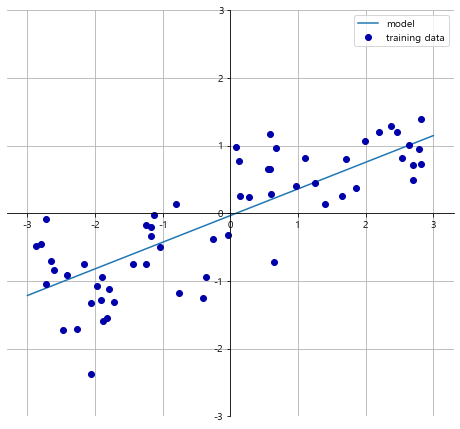

In [31]:
# wave 데이터셋에 대한 선형 모델 예측
# y^(헷) = w[0]*x[0]+b
mglearn.plots.plot_linear_regression_wave()

- 가중치(기울기) w 약 0.4
- knn의 그래브와 비교하면 직선을 사용한 예측에는 제약이 많아보이지만, 특성이 많아지면 선형 모델도 좋은 성능을 낼 수 있음

## 선형 회귀 (최소제곱법)
- 예측과 훈련 세트에 있는 타깃 y 사이의 **평균제곱오차(MSE)를 최소화**하는 파라미터 w와 b를 찾음
- 선형 회귀는 매개변수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 방법이 없는 것이 단점

### wave dataset

In [32]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 모델 생성, 학습
lr = LinearRegression().fit(X_train, y_train)

In [33]:
# 기울기 파라미터(w): 가중치/계수 - coef_에 저장되어있음(각 입력 특성에 하나식 대응되는 numpy배열)
print('lr.coef_:', lr.coef_)
# 편향/절편 파라미터(b) - intercept_에 저장되어있음(항상 실수값 하나를 가짐)
print('lr.intercept_:', lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [34]:
# 성능 평가   # 회귀: R^2
print('훈련 세트 점수: {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


- R^2값이 좋지는 않지만, 훈련 세트와 테스트 세트의 점수가 비슷하므로, 과소적합 상태인 것을 의미

### 보스턴 주택가격 data set -  복잡한 데이터셋
- 샘플 506개, 특성 104개 (유도된 특성 포함)

In [35]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [36]:
print('훈련 세트 점수: {:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


- 훈련 세트의 점수는 높지만, 테스트 세트에서는 R^2값이 매우 낮음 -> 과대적합 되었다는 의미

## 리지(Ridge) 회귀 - 복잡도 제어할 수 있는 모델
- 규제: 가중치의 절댓값을 가능한 작게 만드는 것. 즉, 가중치(w)의 모든 원소가 0에 가깝게 만듬  => 모든 특성이 출력에 미치는 영향을 최소한으로 만듬
    - L2 규제: 알파(alpha) 값을 크게하면 패널티/규제가 커져서 가중치 감소
        - alpha 기본값 = 1.0

### 알파(alpha) 값 조정에 따른  성능 변화 (규제)

In [37]:
# 기본값 리지(Ridge)
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)     # 기본값 alpha = 1.0 사용
print('훈련 세트 점수: {:.2f}'.format(ridge.score(X_train, y_train)))    # R^2
print('테스트 세트 점수: {:.2f}'.format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


- 일반 선형회귀보다 훈련세트 점수는 낮지만, 테스트 세트 점수는 더 높음 (규제 강화로 복잡도 제어(과대적합 완화) -> 일반화 성능 높임)

In [38]:
# alpah 1 -> 10으로 증가시킨 경우  => 패널티 증가해 가중치 감소
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [39]:
# alpah 1 -> 0.1으로 감소시킨 경우  => 패널티 감소해 가중치 거의 규제 X => 규제가 없는 일반 선형 모델과 거의 비슷해짐
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


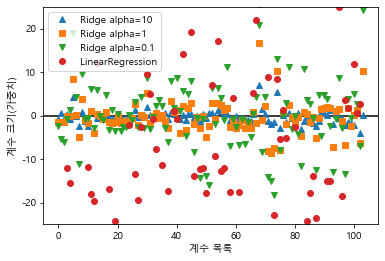

In [43]:
# alpha값에 따라 모델의 coef_ 속성(가중치) 변화 시각화
plt.plot(ridge10.coef_, '^', label ='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label ='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label ='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('계수 목록')
plt.ylabel('계수 크기(가중치)')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

- x축은 coef_ 원소의 위치대로 나열한 것. 즉, x=0은 첫번째 특성, x=1은 두번째 특성
- y축은 각 특성/계수의 수치(가중치)

### alpha 값을 고정하고, 훈련 데이터의 크기를 변화시켜 규제 효과 확인하기

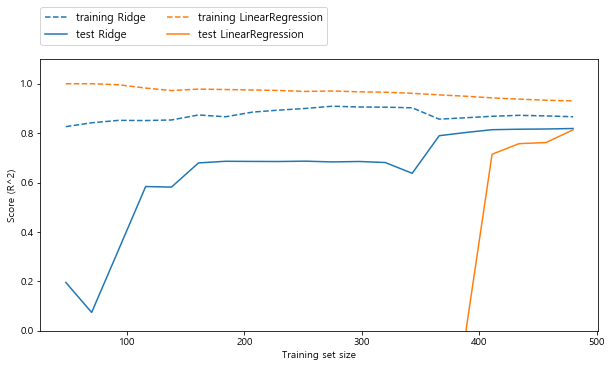

In [45]:
# alpha=1.0 기본값 적용함
# 데이터셋의 크기에 따른 모델의 성능 변화 - 학습곡선 그리기
plt.figure(figsize=(10,5))
mglearn.plots.plot_ridge_n_samples()

- 테스트 데이터 기준
    - 전체적으로 & 데이터가 비교적 작은 경우 **리지(Ridge)의 점수가 더 높으며, 데이터를 충분히 추면 규제 항은 덜 중요해져서 리지(Ridge)회귀와 선형(Linear)회귀의 성능이 같아짐**
- 선형 회귀의 훈련데이터 성능이 감소함 -> 데이터가 많아질 수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문

## 라소(Lasso)
- 계수를 0에 가깝게 or 0으로 만듬
- 특정 변수는 0이되어, 특성에서 제외되는 경우 발생함 → **특성 선택**이 자동으로 이뤄짐
    - 모델을 이해하기/분석하기 쉬워짐
    - 모델의 가장 중요한 특성 알 수 있음
    ```python
    # 사용한 특성 개수 조회
    np.sum(lasso.coef_ != 0)
    ```
- L1 규제: 계수 벡터의 L1 노름을 패널티로 사용 (계수 절댓값의 합)
- alpha = 1.0
    - alpha 값 줄일 때 max_iter의 값 늘려야함 (안하면 경고 나타남)

# 분류용 선형 모델
**분류에서 선형 모델은**
- 낮은 차원 데이터에서 결정 경계가 직선, 평면 이여서 매우 제한적이게 보임
- 하지만, 고차원에서는 매우 강력해짐. 과대적합되지 않도록 주의해야함

## 이진 분류 (binary classification)
- 방정식은 선형 회귀와 같으나, 예측한 값을 임계치 0과 비교
    - 예측값 < 0   ->   class: -1
    - 예측값 > 0   ->   class: 1
- 결정 경계(선, 평면, 초평면)로 두 개의 클래스를 구분하는 분류기

### 선형 분류 알고리즘
1. 로지스틱 회귀(Logistic Regression)
2. 서포트 벡터 머신의 LinearSVC(Support Vector Classifier)

- 두 모델은 기본적으로 L2 규제 사용
    - 규제를 강하게 할 수록 계수들은 0에 더 가깝게 만들지만, 완전히 0이 되지는 않음
- 규제 강도 조절 매개변수: C (기본값 1.0)
    - C 값이 높아지면 규제가 감소 (개개의 데이터 포인트를 정확히 분류하려고 노력함)
    - C 값이 낮아지면 계수 벡터(w, 가중치)를 0에 가까워지도록 만듬 (데이터 포인트 중 다수에 맞추려고 노력함)

In [1]:
import mglearn

C:\Users\qkrwl\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\qkrwl\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


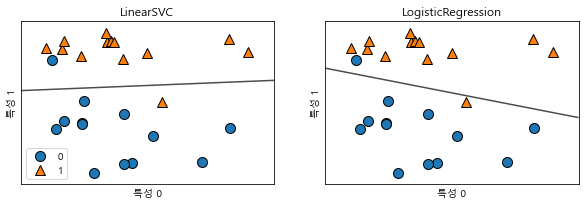

In [5]:
# 'forge' data set을 사용해 두 개 분류 모델 비교
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend()

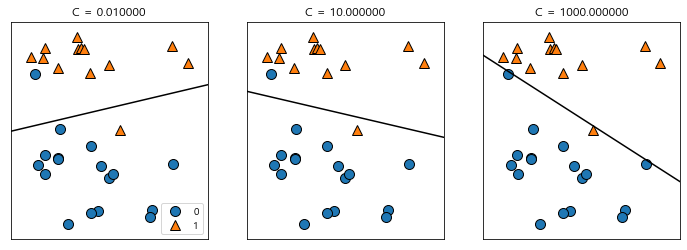

In [8]:
# LinearSVC
# forge data set에 각기 다른 C 값으로 만든 선형 svm 모델 결정 경계
mglearn.plots.plot_linear_svc_regularization()

- (왼쪽) 규제가 강해진 모델은 비교적 수평에 가까운 결정 경계 생성됨
- (중간) 규제가 비교적 약해져, 잘못 분류된 2개 샘플에 민감하게 되어 결정 경계가 기움
- (오른쪽) 규제가 아주 약해져, 결정 경계가 많이 기울어짐. 클래스 0의 분류 오류 없어짐  (모든 데이터 포인트를 정확하게 분류하려고 애씀. 과대적합됨)

In [ ]:
# 고차원 데이터로

In [20]:
# 유방암 데이터셋, logistic
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
                    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=3000).fit(X_train, y_train)
print('훈련 세트 점수: {:.3f}'.format(logreg.score(X_train, y_train)))
print('테스트 세트 점수: {:.3f}'.format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


- 기본값 C=1로 훈련 세트와 테스트 세트에 모두 좋은 성능을 내고 있음
- 하지만, 훈련 세트와 테스트 세트의 성능이 매우 비슷하므로 과소적합된 것 같음   
-> 규제 약해지도록 조정해보자!

In [22]:
# 규제 약하게
logreg100 = LogisticRegression(C=100,max_iter=3000).fit(X_train, y_train)
print('훈련 세트 점수: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('테스트 세트 점수: {:.3f}'.format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


- 정확도가 더 높아짐

In [23]:
# 규제 강하게
logreg001 = LogisticRegression(C=0.01,max_iter=3000).fit(X_train, y_train)
print('훈련 세트 점수: {:.3f}'.format(logreg001.score(X_train, y_train)))
print('테스트 세트 점수: {:.3f}'.format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


- 정확도가 기본값일 때보다 낮아짐 (이미 과소적합된 모델에서 더 강하게 규제하니까 성능 더 낮아짐)

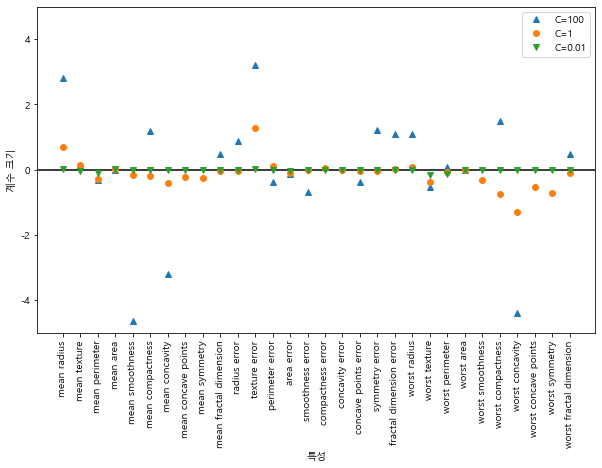

In [27]:
# 규제 매개변수에 따른 모델 계수 확인
plt.figure(figsize=(10,6))
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel('특성')
plt.ylabel('계수 크기')
plt.legend()

- 규제를 강하게 할 수록 0에 더 가까워지지만 완전히 0이되지 않음 (L2 규제)
- C 값을 어떻게 조절하냐에 따라 일부 특성의 계수가 바뀜(음수 -> 양수)
    - 높은 일부 특성 값은 양성이나 악성 신호 모두가 될 수 있음
    - 따라서, 선형 모델의 계수는 항상 의심해봐야하며, 조심히 해석해야함

C=0.010 인 l1 로지스틱 회귀의 train 정확도: 0.92
C=0.010 인 l1 로지스틱 회귀의 test 정확도: 0.93
C=1.000 인 l1 로지스틱 회귀의 train 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 test 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 train 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 test 정확도: 0.98


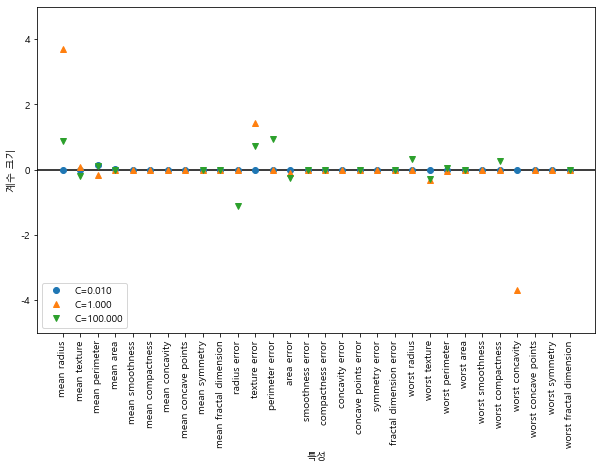

In [33]:
# L1 규제 사용해보기
# Solver='lbfgs' (기본값) supports only 'l2'  -> # Solver='liblinear'로 변경해야 'l1'규제 사용가능
plt.figure(figsize=(10,6))

for C, marker in zip([0.01, 1, 100], ['o','^','v']):
    lr_l1 = LogisticRegression(solver='liblinear',C=C, penalty="l1").fit(X_train, y_train)  # Solver='lbfgs' -> 'liblinear'
    print('C={:.3f} 인 l1 로지스틱 회귀의 train 정확도: {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print('C={:.3f} 인 l1 로지스틱 회귀의 test 정확도: {:.2f}'.format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel('특성')
plt.ylabel('계수 크기')
plt.legend(loc=3)

- 일부 주요 특성만 사용한 l1규제가 l2 규제 보다 성능이 더 좋게 나타남

## 다중 클래스 분류용 선형 모델
- 많은 선형 분류 모델은 이진 분류만 지원
- 로지스틱 회귀는 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘 지원
- linearSVC도 다중 클래스 분류 지원

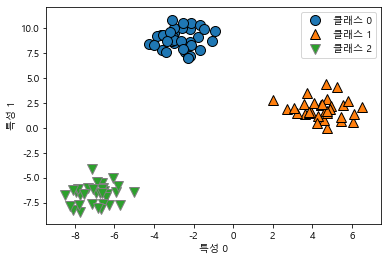

In [5]:
import mglearn
from sklearn.datasets import make_blobs   # 3개의 클래스를 가진 데이터셋 (2차원)

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클래스 0','클래스 1','클래스 2'])

In [6]:
# linearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X,y)
print('계수 배열의 크기: ', linear_svm.coef_.shape)
print('절편 배열의 크기: ', linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


In [8]:
linear_svm.coef_

array([[-0.17492827,  0.2314071 ],
       [ 0.47621494, -0.06936547],
       [-0.18914371, -0.20399564]])

In [7]:
linear_svm.intercept_

array([-1.07745407,  0.13140645, -0.08604817])

- coef_의 행은 3개의 클래스에 각각 대응하는 계수 벡터 담고 있으며, 열은 각 특성에 따른 계수 값(여기서는 2개)을 가지고 있음
- intercept_는 각 클래스의 절편을 담고있는 1차원 벡터

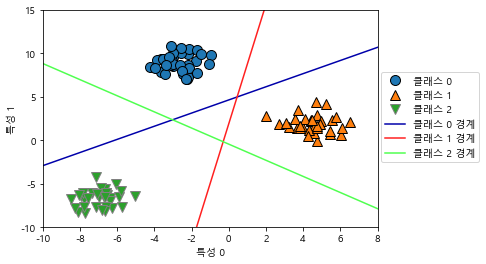

In [14]:
# 시각화(클래스가 3개 -> 이진 분류기도 3개 만들어짐)
mglearn.discrete_scatter(X[:, 0], X[:, -1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'], loc=(1.01, 0.3))

Text(0, 0.5, '특성 1')

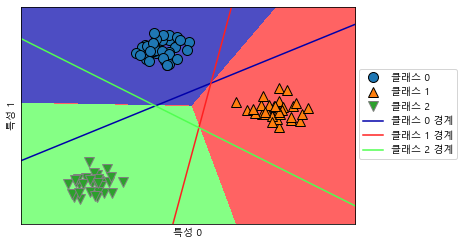

In [17]:
# 예측 결과 시각화
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel('특성 0')
plt.ylabel('특성 1')

# 나이브 베이즈 분류기
- 로지스틱 회귀나 LinearSVC 같은 선형 분류기보다 훈련 속도가 빠른편. 대신, 일반화 성능이 조금 떨어짐
- 각 특성을 개별로 취급해 파라미터를 학습하고, 각 특성에서 클래스별 통계를 단순하게 취합
- 종류
    - GaussianNB: 연속적인 데이터에 적용
    - BernoulliNB: 이진 데이터
    - MultinomialNB: 카운트 데이터 (특성이 어떤 것을 센 정수 카운트. ex. 문장에 나타난 단어 횟수)
- BernoulliNB, MultinomialNB는 대부분 텍스트 데이터를 분류할 때 사용함

In [18]:
X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])
y = np.array([0,1,0,1])   # class: 0, 1 두 개

In [19]:
counts = {}
for label in np.unique(y):
    # 각 클래스에 대해 반복
    # 특성마다 1이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)
print('특성 카운트:\n', counts)

특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}
